In [61]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
#%matplotlib inline
import time
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [62]:
def createTrainingData(start, end):
    samples = []
    l1=[376,248,251]
    l2=[334,339,294]

    '''a,s=librosa.load("C:\\Users\\Dell\\Desktop\\appa.m4a")
    mfcc1= librosa.feature.mfcc(y=a,sr=s)
    newind=[]
    concatfeatures(newind,mfcc1)
    newind=np.asarray(newind)
    #for v in range(10):
    samples.append([newind[0],1))'''
   # print(newind[0])
    for q,r in zip (l1,l2):

        for i in range(1,10):
            ind=0
            am=0
            try:
                a,s=librosa.load("./Indian/p"+str(q)+"_00"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("./American/p"+str(r)+"_00"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])
                print('*', end=' ')

            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(10,100):
            ind=0
            am=0
            try:
                a,s=librosa.load("./Indian/p"+str(q)+"_0"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("./American/p"+str(r)+"_0"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])
                print('*', end=' ')

            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(100,430):
            ind=0
            am=0
            try:
                a,s=librosa.load("./Indian/p"+str(q)+"_"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("./American/p"+str(r)+"_"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])
                print('*', end=' ')

            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])
                print('#', end=' ')
            else: continue
        print('\n')

    print(len(samples))
    X = [i[0] for i in samples]
    Y = [j[1] for j in samples]
    return X,Y

def concatfeatures(realdata, mfcc1):
    temp1=mfcc1.T[1][1:19]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:19]))
    #print(temp1)
    realdata.append(temp1)

def concatfeatures1(realdata, mfcc1):
    temp1=mfcc1.T[1][1:13]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:13]))
    #print(temp1)
    realdata.append(temp1)

In [63]:
data, label =createTrainingData(1,19)

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # 

<ipython-input-62-563df29a9819>:59: UserWarning: PySoundFile failed. Trying audioread instead.
  a,s=librosa.load("./Indian/p"+str(q)+"_0"+str(i)+".wav")
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


* * * * * * * * * * * * * * # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * $ 

<ipython-input-62-563df29a9819>:102: UserWarning: PySoundFile failed. Trying audioread instead.
  b,t=librosa.load("./American/p"+str(r)+"_"+str(i)+".wav")


* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

<ipython-input-62-563df29a9819>:98: UserWarning: PySoundFile failed. Trying audioread instead.
  a,s=librosa.load("./Indian/p"+str(q)+"_"+str(i)+".wav")


# * * * * * * * * * * * * * * # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * $ * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)

In [65]:
y_train

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,


In [66]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 1013), (1, 1013)]


In [67]:
Counter(label)

Counter({1: 1032, 0: 1269})

In [68]:
s = time.time()
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=len(X_resampled[1]), units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_resampled, y_resampled, batch_size = 10, epochs = 50,verbose=0)
y_pred = classifier.predict(np.array(X_test))
print(time.time()-s)

15/15 [==============================] - 0s 2ms/step
33.97782826423645


In [69]:
score = classifier.evaluate(np.array(X_test), np.array(y_test), batch_size=2000)
print(score)
confusion_matrix(np.array(y_test), y_pred.round())

1/1 [==============================] - 0s 205ms/step - loss: 0.2545 - accuracy: 0.9653
[0.2544635832309723, 0.9652928709983826]


array([[247,   9],
       [  7, 198]])

In [70]:
X_train = np.asarray(X_train)
X_train.shape

(1840, 738)

In [71]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
(tn, fp, fn, tp)

(247, 9, 7, 198)

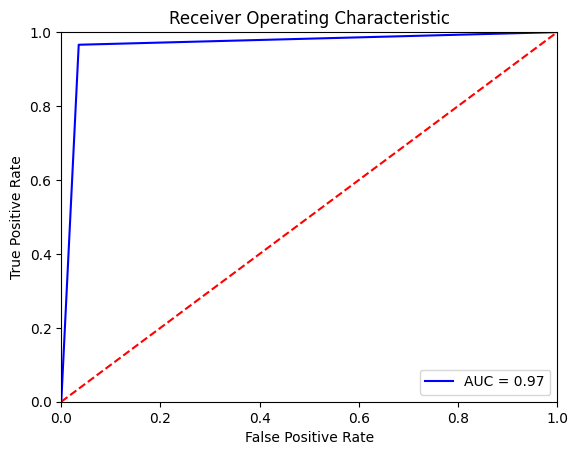

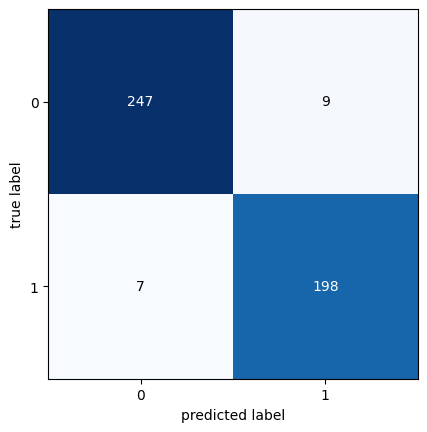

In [72]:
def plotCurve(y_test1,y_pred,name):
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    name = '../'+name+'.png'
    plt.savefig(name)
    plt.show()
    return roc_auc
auc = plotCurve(y_test,y_pred.round(),'nn-aoc')

binary = confusion_matrix(y_test,y_pred.round())
fig, ax = plot_confusion_matrix(conf_mat=binary)
n = '../nn.png'
plt.savefig(n)
plt.show()

In [73]:
precision = round(tp/(tp+fp),4)
recall = round(tp/(tp+fn),4)
fmeasure = round(2*((precision*recall)/(precision+recall)),4)
rej = round(tn/(tn+fp),4)
acc = round((tn+tp)/(tn+tp+fp+fn),4)

In [74]:
%time
print(precision,recall,fmeasure,rej,acc)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
0.9565 0.9659 0.9612 0.9648 0.9653


In [75]:
def nn():
    classifier = Sequential()
    classifier.add(Dense(activation="relu", input_dim=len(X_resampled[1]), units=6, kernel_initializer="uniform"))
    classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
    classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

neural_network = KerasClassifier(build_fn=nn,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)
score = cross_val_score(neural_network, np.array(data),np.array(label), cv=10)
score.mean(), score.std()

<ipython-input-75-88babb5f73d8>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasClassifier(build_fn=nn,


(0.9522209644317627, 0.03138215781480273)